## Gráficos básicos (Parte I)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('../data')

%matplotlib inline

In [17]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Gráfico de líneas

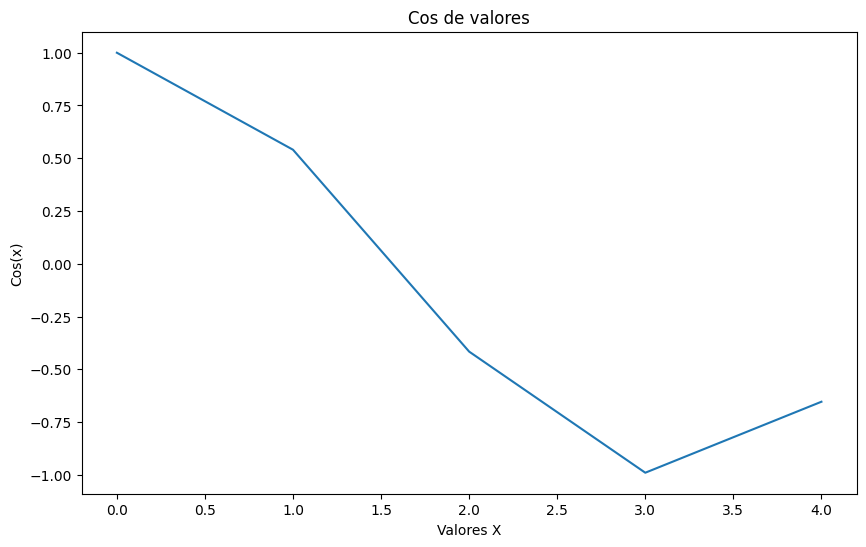

In [18]:
fig, ax = plt.subplots(figsize = (10,6))

x = np.arange(5)
y = np.cos(x)

ax.plot(x, y)
ax.set(xlabel = 'Valores X', ylabel = 'Cos(x)', title = 'Cos de valores');

### Gráfico de barras

In [19]:
num_by_bathrooms = data.groupby('bedrooms')['price'].count()
num_by_bathrooms

bedrooms
0.0       2
1.0      38
2.0     566
3.0    2032
4.0    1531
5.0     353
6.0      61
7.0      14
8.0       2
9.0       1
Name: price, dtype: int64

Text(0, 0.5, 'Numero de filas')

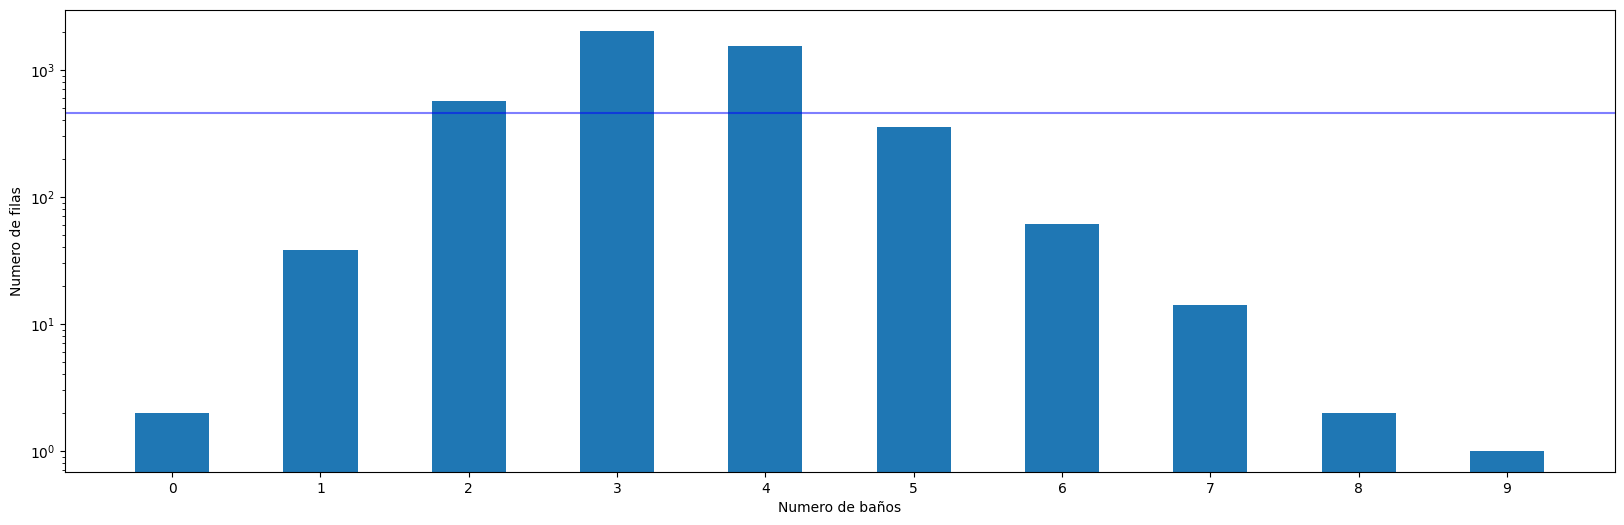

In [20]:
fig, ax = plt.subplots(figsize = (20, 6))

ax.bar(x = num_by_bathrooms.index.values, height=num_by_bathrooms.values, width = 0.5, align='center')
ax.axhline(num_by_bathrooms.mean(), color = 'blue', alpha = .5)

ax.set_xticks(num_by_bathrooms.index.values)
ax.set_yscale('log') # linear

ax.set_xlabel('Numero de baños')
ax.set_ylabel('Numero de filas')

Text(0.5, 1.0, 'Histograma de precio')

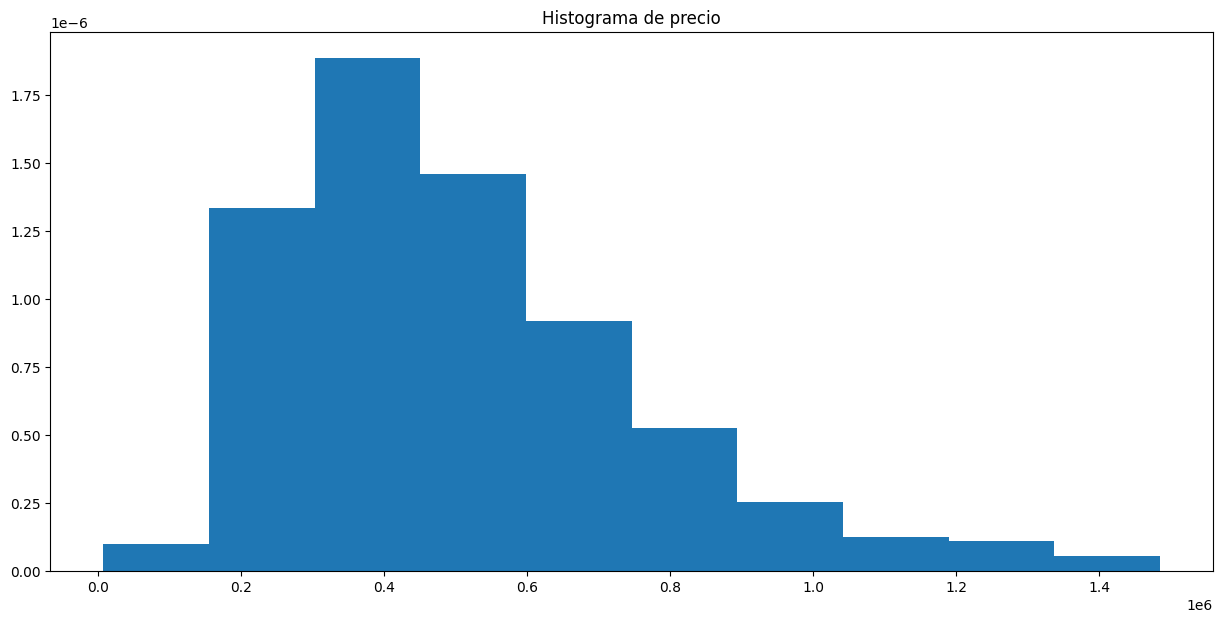

In [21]:
price = data.query('price > 0 and price < 1_500_000')['price']

fig, ax = plt.subplots(figsize = (15, 7))

ax.hist(price, bins=10, density=True)
ax.set_title('Histograma de precio')

In [22]:
data['condition'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

Text(0, 0.5, 'sqft_living')

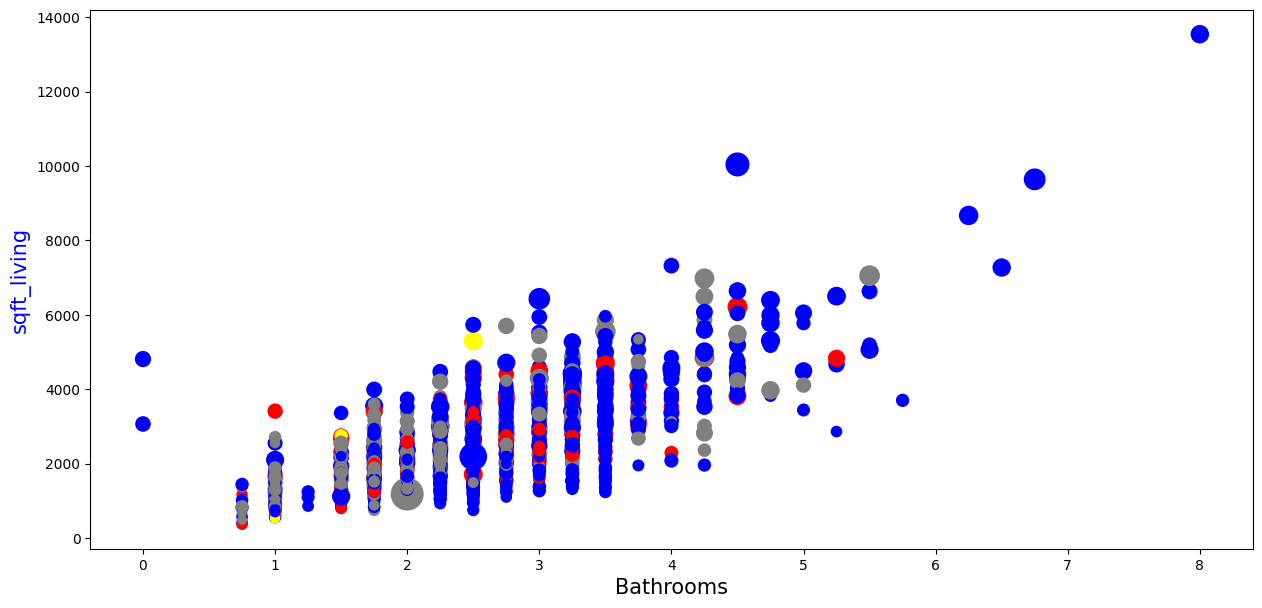

In [23]:
fig, ax = plt.subplots(figsize = (15, 7))

x = data['bathrooms']
y = data['sqft_living']

vol = np.sqrt(data['price'])/10

colors = ["", "green", "yellow", "blue", "gray", "red"]

ax.scatter(x = x, y = y, s = vol, c = data['condition'].apply(lambda x: colors[x]))

ax.set_xlabel('Bathrooms', fontsize = 15)
ax.set_ylabel('sqft_living', c = 'blue', fontsize = 15)

## Gráficos básicos (Parte II)

#### Gráfico de tartas

In [24]:
cities = data.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')
vc = cities['city'].value_counts(normalize = True)
vc

city
Seattle     0.611111
Renton      0.113831
Bellevue    0.111111
Redmond     0.091298
Issaquah    0.072650
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1b8586f2ab0>,
 [Text(-0.41042414852936965, 1.127631153482353, 'Seattle'),
  Text(-0.5418412308900982, -0.9572920560139959, 'Renton'),
  Text(0.20949445196421776, -1.079866692974745, 'Bellevue'),
  Text(0.957119452735408, -0.8797285679091441, 'Redmond'),
  Text(1.0714738797681957, -0.24888496333545337, 'Issaquah')],
 [Text(-0.23941408664213226, 0.6577848395313726, '61.1%'),
  Text(-0.2955497623036899, -0.5221593032803614, '11.4%'),
  Text(0.11426970107139148, -0.5890181961680426, '11.1%'),
  Text(0.5889965862987125, -0.5413714264056271, '9.1%'),
  Text(0.5844402980553794, -0.1357554345466109, '7.3%')])

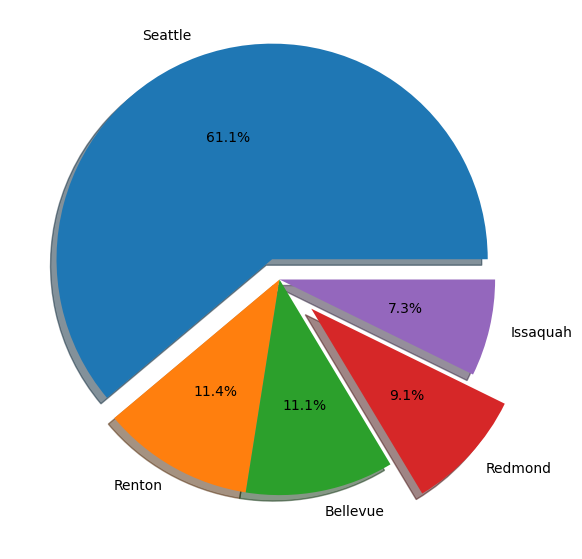

In [25]:
fig, ax = plt.subplots(figsize = (15, 7))

explode = [0.1, 0, 0, 0.2, 0]
ax.pie(vc, labels=vc.index, explode=explode, shadow = True, autopct='%1.1f%%', startangle=0, )

In [26]:
df = data.query('condition in (2,3,4) and bedrooms in (1,2,3)')
_ = df.pivot_table(index = 'condition', columns = 'bedrooms', values = 'price', aggfunc=np.count_nonzero)
_

bedrooms,1.0,2.0,3.0
condition,,,
2,4,11,9
3,23,340,1248
4,6,155,587


In [27]:
price_mean = df.groupby('bedrooms')['price'].mean()
price_mean

bedrooms
1.0    270825.000000
2.0    384626.305381
3.0    481533.162858
Name: price, dtype: float64

Text(0, 0.5, 'Precio medio segun nº baños')

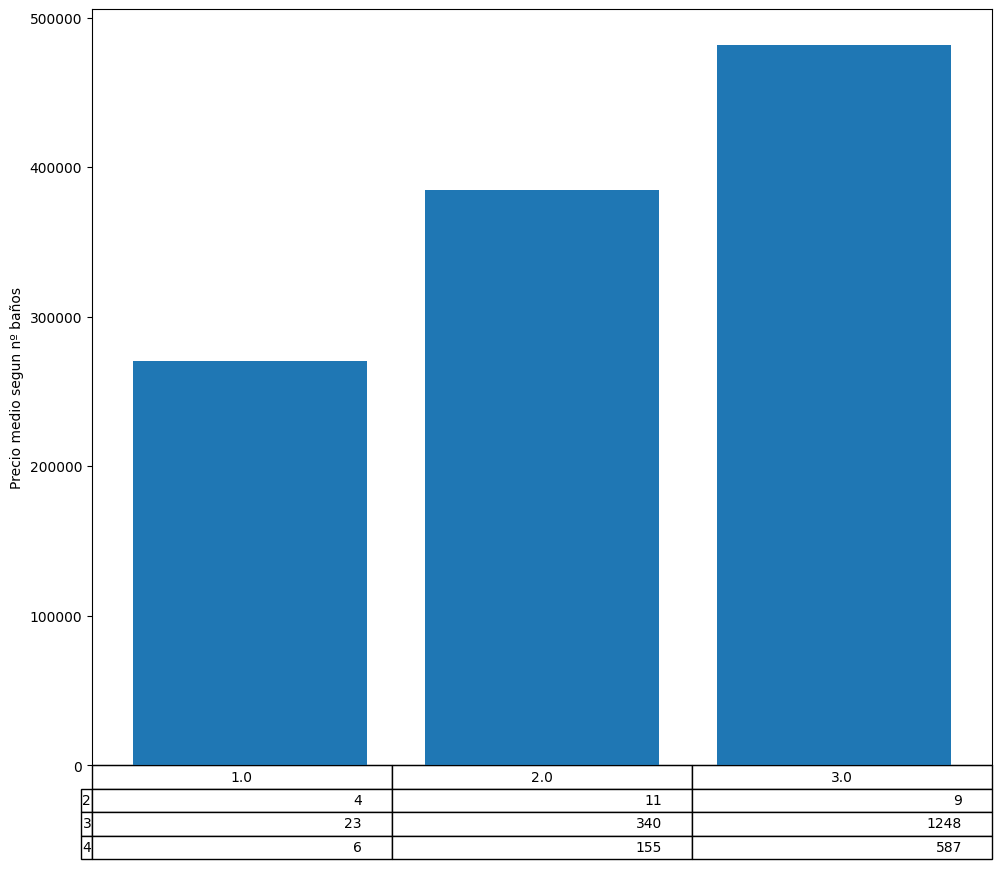

In [28]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(x = price_mean.index, height=price_mean.values)
ax.table(_.values, loc='bottom', rowLabels=_.index.values, colLabels=_.columns.values)

plt.subplots_adjust(left=0, bottom=-.2)
plt.xticks([])

plt.ylabel('Precio medio segun nº baños')